In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt

In [2]:
data = pd.read_csv("E:\\Desktop\\Stochastic Processes and Applications\\assignment\\HASU Historical Data.csv",usecols=['Date', 'Price'])

In [3]:
data['Time Index'] = range(len(data))

# Display the first few rows to verify
data.head()

,Date,Price,Time Index
0,6/20/2022,32.2,0
1,6/21/2022,33.0,1
2,6/22/2022,33.0,2
3,6/23/2022,33.0,3
4,6/24/2022,35.0,4


In [4]:
data.head()

,Date,Price,Time Index
0,6/20/2022,32.2,0
1,6/21/2022,33.0,1
2,6/22/2022,33.0,2
3,6/23/2022,33.0,3
4,6/24/2022,35.0,4


## question (b)

In [6]:
data['Log Return'] = np.log(data['Price']) - np.log(data['Price'].shift(1))

# Drop the first row since it will have a NaN value for log return
data = data.dropna()

# Display the first few rows to verify
data.head()

,Date,Price,Time Index,Log Return
1,6/21/2022,33.0,1,0.024541
2,6/22/2022,33.0,2,0.000000
3,6/23/2022,33.0,3,0.000000
4,6/24/2022,35.0,4,0.058841
5,6/27/2022,35.1,5,0.002853


In [7]:
data.tail()

,Date,Price,Time Index,Log Return
493,7/8/2024,58.0,493,0.012142
494,7/9/2024,57.8,494,-0.003454
495,7/10/2024,58.0,495,0.003454
496,7/11/2024,58.1,496,0.001723
497,7/12/2024,58.2,497,0.001720


## question (c)

In [17]:
# Estimate the drift and scale parameters
mu_GB = data['Log Return'].mean()
sample_var = data['Log Return'].var()
scale_parameter = sqrt(sample_var)

drift_para = mu_GB + (sample_var/2)

print('drift parameter is : ',drift_para)

drift parameter is :  0.0014643431761106609


In [16]:
print('scale parameter is :',scale_parameter)

scale parameter is : 0.023382021704588297


### To check the appropriateness of modeling the closing price using GBM, we can visualize the log returns and their distribution.

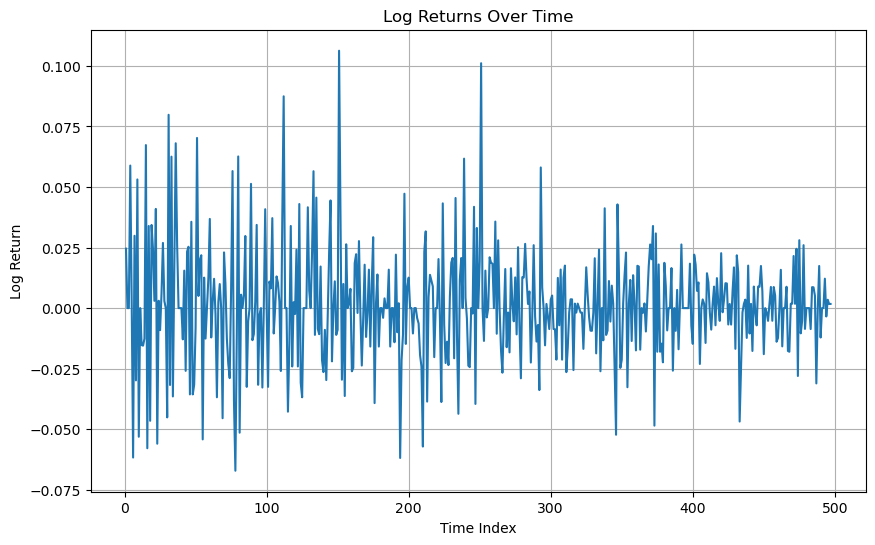

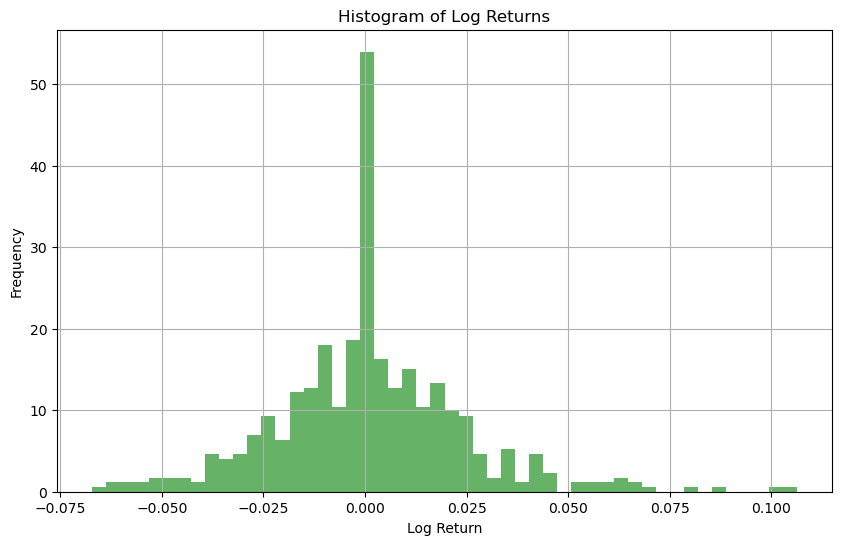

In [13]:
# Plot the log returns
plt.figure(figsize=(10, 6))
plt.plot(data['Time Index'], data['Log Return'])
plt.xlabel('Time Index')
plt.ylabel('Log Return')
plt.title('Log Returns Over Time')
plt.grid(True)
plt.show()

# Plot the histogram of log returns
plt.figure(figsize=(10, 6))
plt.hist(data['Log Return'], bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title('Histogram of Log Returns')
plt.grid(True)
plt.show()

## question (e)

In [24]:
mu_GB = drift_para
sigma_GB = scale_parameter

# Define the BrownianG function
def BrownianG(m, T, N, sigma, mu, w0, GB=False):
    dt = T / N
    x = np.zeros((m, N + 1))
    x[:, 0] = w0
    x0 = x[:, 0]

    if not GB:
        r = norm.rvs(size=x0.shape + (N,), loc=mu * dt, scale=sigma * sqrt(dt))
        np.cumsum(r, axis=-1, out=x[:, 1:])
        x[:, 1:] += w0
    else:
        r = norm.rvs(size=x0.shape + (N,), loc=mu * dt, scale=sigma * sqrt(dt))
        np.cumsum(r, axis=-1, out=x[:, 1:])
        if w0 != 0:
            x[:, 1:] = w0 * np.exp(x[:, 1:])
        else:
            x[:, 1:] = np.exp(x[:, 1:])
    
    return x

# Simulate sample paths
m = 5000
T = 20
N = 20
sigma = sigma_GB
mu = mu_GB
w0 = data['Price'].iloc[-1]

sample_paths = BrownianG(m, T, N, sigma, mu, w0, GB=True)

# Print the 5000 simulated values for the closing prices
simulated_values = sample_paths[:, -1]
print("Simulated values for the closing prices of HASU stock on the last day of the next 20-day period:")
print(simulated_values)


Simulated values for the closing prices of HASU stock on the last day of the next 20-day period:
[58.48464577 65.79823353 52.45312311 ... 49.69251542 67.54837878
 67.11520091]


## quetion (f)

In [19]:
def BrownianPlot(y, T):
    N = y.shape[1]  
    dt = T / (N - 1)
    t = np.linspace(0.0, N * dt, N)
    for k in range(y.shape[0]):
        plt.plot(t, y[k])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Simulated Sample Paths')
    plt.grid(True)
    plt.show()

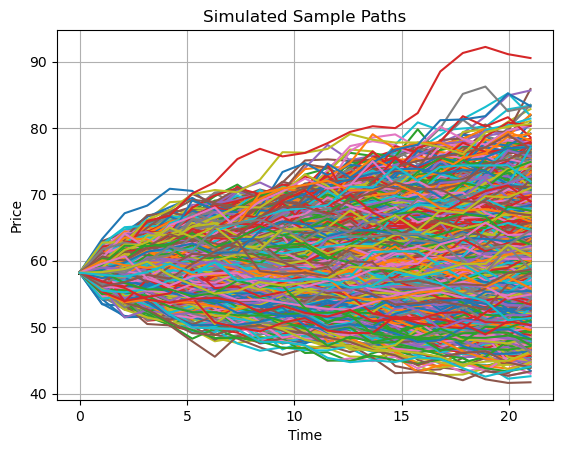

In [20]:
BrownianPlot(sample_paths, T)


## question (g)

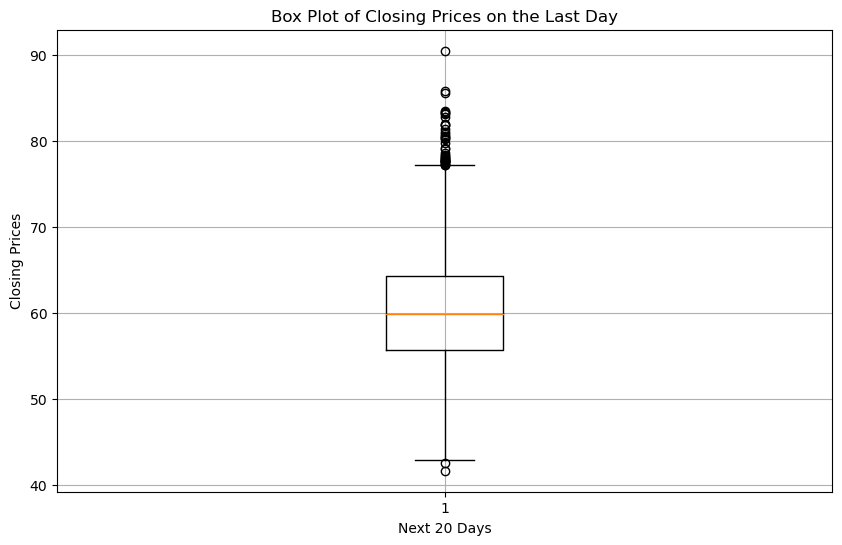

In [21]:
last_day_prices = sample_paths[:, -1]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(last_day_prices)
plt.xlabel('Next 20 Days')
plt.ylabel('Closing Prices')
plt.title('Box Plot of Closing Prices on the Last Day')
plt.grid(True)
plt.show()

## question (h)

In [22]:
probability = np.mean((last_day_prices > 55) & (last_day_prices < 60))
print(f'Probability that the closing price is between 55 and 60: {probability}')


Probability that the closing price is between 55 and 60: 0.2952


## question (i)

In [23]:
prediction_interval = np.percentile(last_day_prices, [2.5, 97.5])
print(f'95% Prediction Interval: {prediction_interval}')

95% Prediction Interval: [48.779908   73.47107384]
